In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [72]:
import warnings
warnings.filterwarnings(action='ignore') 

In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import datasets
import mglearn
from IPython.display import display

In [311]:
digits = load_digits()

In [312]:
y = digits.target
x = digits.data

In [296]:
x.shape

(1797, 64)

In [297]:
y.shape

(1797,)

In [302]:
x[55]

array([ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,
       15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5.,
       16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7.,
        0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16.,
       16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.])

In [306]:
y[55]

0

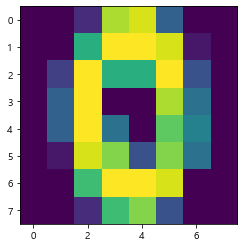

In [305]:
plt.imshow(x[55].reshape(8,8))

In [310]:
y[9]

False

In [81]:
pd.Series(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [315]:
y = y == 9

In [316]:
pd.Series(y).value_counts()

False    1617
True      180
dtype: int64

In [317]:
# imbalanced dataset (불균형 데이터) : 정상 범주의 관측치 수와 이상 범주의 관측치 수가 현저히 차이나는 데이터
pd.Series(y).value_counts()/len(y)    # imbalanced dataset (불균형 데이터)

False    0.899833
True     0.100167
dtype: float64

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [320]:
from sklearn.dummy import DummyClassifier

# 'most_frequent' : 다수의 클래스로 예측하는 classifier 생성 (최빈값)
# 위의 데이터에 대해 100% False로만 예측 (False가 90%인 데이터 : 최빈값이 False)
dummy_majority = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)

In [321]:
preds = dummy_majority.predict(x_test)
preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [322]:
# 실제 y에는 90%의 False, 10%의 True
# preds는 100% False
np.mean(y_test == preds)

0.8955555555555555

In [323]:
dummy_majority.score(x_test, y_test)

# 전혀 분류능력이 없는 classifier가 90%의 accuracy score(정확도)를 기록 <= imbalanced dataset(불균형 데이터)이기 때문
# => accuracy의 한계 => precision, recall, f1_score

0.8955555555555555

In [332]:
# accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_acc = tree.score(x_test, y_test)
knn_acc = knn.score(x_test, y_test)
svc_acc = svc.score(x_test, y_test)
dummy_acc = dummy_majority.score(x_test, y_test)

print('Tree :', round(tree_acc,2), 'Knn :', round(knn_acc,2), 'SVC :', round(svc_acc,2), 'dummy :', round(dummy_acc,2))

Tree : 0.96 Knn : 1.0 SVC : 1.0 dummy : 0.9


In [333]:
from sklearn.metrics import f1_score

In [334]:
# f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_preds = tree.predict(x_test)
knn_preds = knn.predict(x_test)
svc_preds = svc.predict(x_test)
dummy_preds = dummy_majority.predict(x_test)

tree_f1 = f1_score(tree_preds, y_test)
knn_f1 = f1_score(knn_preds, y_test)
svc_f1 = f1_score(svc_preds, y_test)
dummy_f1 = f1_score(dummy_preds, y_test)


print('Tree :', round(tree_f1,2), 'Knn :', round(knn_f1,2), 'SVC :', round(svc_f1,2), 'dummy :', round(dummy_f1,2))

Tree : 0.77 Knn : 0.99 SVC : 0.99 dummy : 0.0


In [335]:
from sklearn.metrics import classification_report, confusion_matrix

In [336]:
cm = confusion_matrix(tree_preds, y_test)
cm

array([[392,  11],
       [ 11,  36]], dtype=int64)

In [337]:
# acc = (cm[0,0] + cm[1,1]) / cm.sum()  # acc

# # 0 class
# precision = cm[0,0]/cm[:,0].sum()
# recall = cm[0,0]/cm[0,:].sum()

![F1_score](http://latex.codecogs.com/gif.latex?F_{1}&space;=&space;2&space;\times&space;\frac{precision&space;\times&space;recall}{precision&space;+&space;recall}&space;=\frac{TP}{TP&space;+&space;\frac{FN+FP}{2}})

In [339]:
print(classification_report(tree_preds, y_test))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       403
        True       0.77      0.77      0.77        47

    accuracy                           0.95       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
# 모든 머신러닝 모델은 내부적으로 확률값을 리턴

In [342]:
from mglearn.datasets import make_blobs

x, y = make_blobs(n_samples=(400,5), centers=2, cluster_std=[7, 2], random_state=11)
print(x[:10], y[:10])

[[ -1.58341978 -22.37156225]
 [ -4.17570775  -5.96493849]
 [-13.82618705 -14.40188785]
 [  0.71057905  -3.81896754]
 [-16.18799493 -17.86041252]
 [ -5.04648232 -13.08413534]
 [ -2.38421045   4.24907617]
 [ -7.62667962  -7.02174225]
 [ -4.33194738 -16.93515838]
 [-10.46971421  -3.7552367 ]] [0 0 0 0 0 0 0 0 0 0]


In [343]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [344]:
svc = SVC(gamma=0.5, probability=True)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [345]:
# svc.decision_function : 0보다 크면 1, 0보다 작으면 0으로 예측
svc.decision_function(x_test)

array([-1.00042127, -0.98834083, -1.00017991, -1.00268102, -1.00259514,
       -1.0097318 , -0.98095167, -0.99972821, -1.00114562, -0.99806483,
       -0.99550865, -0.99961719, -0.99849675, -0.98472113, -0.99423151,
       -0.99603354, -0.99907795, -0.99892433, -0.99827454, -0.99601774,
       -0.9925531 , -0.99938851, -0.55276913, -0.99923388, -0.99996865,
       -0.99892612, -0.99178177, -0.97920177, -0.99391665, -0.99821058,
       -0.97968924, -1.00020803, -0.98653578, -0.99996991, -0.99592681,
       -1.00038151, -1.00016914, -0.99484696, -1.00007618, -1.00023198,
       -1.00127871, -1.00007277, -0.99350691, -0.98912015, -0.97884923,
       -0.9934615 , -0.99424342, -0.98915669, -0.99371648, -1.00037992,
       -0.99657723, -0.99981443, -0.97809583, -1.00127669, -0.99545891,
       -1.00064909, -0.99691643, -0.98011279, -0.99466191, -0.9927486 ,
       -0.98245218, -0.99870695, -0.98365529, -0.9927829 , -0.99880466,
       -0.99993715, -0.9996613 , -0.99927742, -0.98167611, -1.00

In [66]:
# sklearn에서 모델이 확률값을 리턴하는 함수
# 1. decision_function() - 0을 기준으로, svc
# 2. predict_proba() - 높은 확률값(0.5 or 둘 중 하나 중 높은 값)을 기준으로, rtc

In [346]:
# predict_proba : 0.5보다 크면 1, 0.5보다 작으면 0으로 예측 
# svc.predict_proba(x_test)[:,0] : sample 데이터가 0일 확률
# svc.predict_proba(x_test)[:,1] : sample 데이터가 1일 확률
svc.predict_proba(x_test)

array([[0.98578356, 0.01421644],
       [0.98549298, 0.01450702],
       [0.98577781, 0.01422219],
       [0.98583727, 0.01416273],
       [0.98583523, 0.01416477],
       [0.98600355, 0.01399645],
       [0.98531234, 0.01468766],
       [0.98576705, 0.01423295],
       [0.9858008 , 0.0141992 ],
       [0.98572734, 0.01427266],
       [0.9856661 , 0.0143339 ],
       [0.9857644 , 0.0142356 ],
       [0.98573766, 0.01426234],
       [0.98540477, 0.01459523],
       [0.98563541, 0.01436459],
       [0.9856787 , 0.0143213 ],
       [0.98575154, 0.01424846],
       [0.98574787, 0.01425213],
       [0.98573235, 0.01426765],
       [0.98567832, 0.01432168],
       [0.98559497, 0.01440503],
       [0.98575895, 0.01424105],
       [0.96996444, 0.03003556],
       [0.98575526, 0.01424474],
       [0.98577278, 0.01422722],
       [0.98574791, 0.01425209],
       [0.98557635, 0.01442365],
       [0.98526923, 0.01473077],
       [0.98562783, 0.01437217],
       [0.98573082, 0.01426918],
       [0.

In [347]:
svc.predict_proba(x_test).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [348]:
# np.where > -1, 1, 0 : -1보다 크면 1 작으면 0
np.where(svc.decision_function(x_test) > -1, 1, 0)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

### 정밀도-재현율 곡선과 평균정밀도
---
- 다양한 예측 확률 임계값을 통해 모델을 평가하는 방법
- 임계값이 변화함에 따라 정밀도와 재현율 값의 변화를 그래프로 나타낸다.
- precision_recall_curve

In [349]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=10000, centers=2, n_features=2, cluster_std=[1.2,1], random_state=0)

In [350]:
x[:5]

array([[0.775567  , 3.57894762],
       [1.21239419, 5.4673358 ],
       [2.81560514, 6.06701785],
       [3.00805773, 0.69934352],
       [2.00577879, 5.67310957]])

In [351]:
y[:5]

array([0, 0, 0, 1, 0])

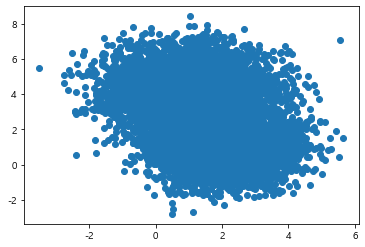

In [352]:
plt.scatter(x[:,0],x[:,1])

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [354]:
from sklearn.svm import SVC
svc = SVC(gamma=0.5).fit(x_train, y_train)

In [355]:
from sklearn.metrics import precision_recall_curve

# thresholds : recall값과 precision값을 적절히 조절해야할때가 있을때 사용
# Thresholds이하의 값은 False, 이상은 True로 판단
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))

Text(0, 0.5, '재현율')

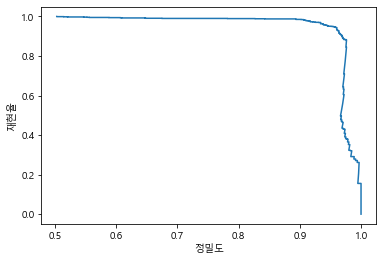

In [357]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

# 정밀도가 높아지면 재현율이 낮아지고, 재현율이 높아지면 정밀도가 낮아진다
# 좋은 모델은 모든 임계값 수준에서 정밀도와 재현율이 동시에 높은 모델
# 정밀도-재현율 곡선의 아랫부분 면적이 클수록 좋은 모델
# 정밀도-재현율 곡선의 아래 면적 : average_precision_score()

In [358]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, svc.decision_function(x_test))

0.9738833430883302

In [362]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=111)
rfc.fit(x_train, y_train)

precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, rfc.predict_proba(x_test)[:,1])

Text(0, 0.5, '재현율')

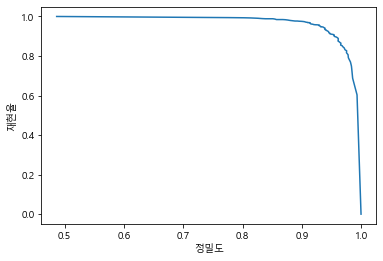

In [363]:
plt.plot(precision_rfc, recall_rfc, label='rfc-정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

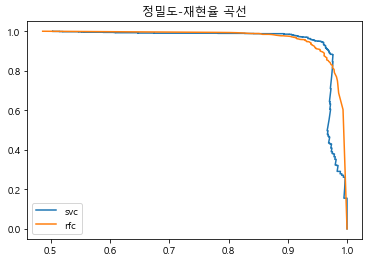

In [364]:
plt.plot(precision, recall, label='svc')
plt.plot(precision_rfc, recall_rfc, label='rfc')
plt.title('정밀도-재현율 곡선')
plt.legend()

In [365]:
svc_aps = average_precision_score(y_test, svc.decision_function(x_test))
rfc_aps = average_precision_score(y_test, rfc.predict_proba(x_test)[:,1])
print('svc_aps :', svc_aps, 'rfc_aps :',rfc_aps)

svc_aps : 0.9738833430883302 rfc_aps : 0.9791388544778379


In [285]:
# ROC-AUC 곡선
# 모든 임계값에서 TPR(진짜 양성비율)과 FPR(거짓 양성비율)을 그래프로 나타낸 곡선
# TPR - 재현율(recall), 실제 True인 데이터에서 True라고 맞춘 비율
# FPR - 거짓 양성비율, 실제 False인 데이터를 True라고 잘못 맞춘 비율
# TPR은 높을수록 좋고, FPR은 낮을수록 좋은 모델
# roc-auc곡선의 면적 : roc_auc_score()
# 특히 imbalaced dataset에서 유용한 평가지표로 사용

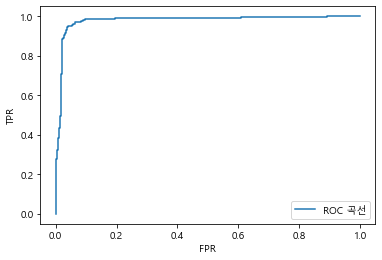

In [366]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# tpr은 높고, fpr은 낮을수록 좋은 모델 - 좌성으로 그려질 수록 좋은 모델

In [367]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

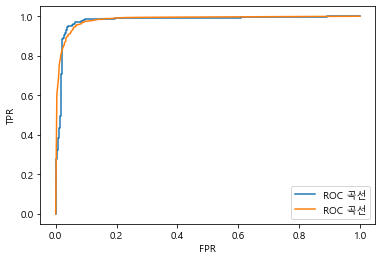

In [368]:
plt.plot(fpr, tpr, label='ROC 곡선')
plt.plot(fpr_rfc, tpr_rfc, label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [369]:
from sklearn.metrics import roc_auc_score
rfc_auc_score = roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])
svc_auc_score = roc_auc_score(y_test, svc.decision_function(x_test))

print('랜덤 포래스트 AUC_SCORE :', rfc_auc_score)
print('SVC AUC_SCORE :', svc_auc_score)

랜덤 포래스트 AUC_SCORE : 0.9830793214051485
SVC AUC_SCORE : 0.9784954500737826
